# Explore here

In [5]:
# Your code hereeee

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

# escalado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')


In [6]:
train_data = pd.read_csv('/workspaces/RandomForest-Jorge3127/data/processed/dataset_limpio_diabetes_arbol_train.csv')
train_data

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,84,0,0.0,0.304,21,0
1,9,112,0,28.2,1.282,50,1
2,1,139,83,28.7,0.654,22,0
3,0,161,0,21.9,0.254,65,0
4,6,134,370,46.2,0.238,46,1
...,...,...,...,...,...,...,...
609,5,139,140,28.6,0.411,26,0
610,1,96,0,22.4,0.207,27,0
611,10,101,0,45.6,1.136,38,1
612,0,141,0,42.4,0.205,29,1


In [7]:
test_data = pd.read_csv('/workspaces/RandomForest-Jorge3127/data/processed/dataset_limpio_diabetes_arbol_test.csv')
test_data

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98,190,34.0,0.430,43,0
1,2,112,0,35.7,0.148,21,0
2,2,108,0,30.8,0.158,21,0
3,8,107,0,24.6,0.856,34,0
4,7,136,0,29.9,0.210,50,0
...,...,...,...,...,...,...,...
149,9,165,0,30.4,0.302,49,1
150,1,77,56,33.3,1.251,24,0
151,8,95,0,36.8,0.485,57,0
152,2,146,360,28.0,0.337,29,1


In [8]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]

X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

In [9]:
print("-----------(1). IDENTIFICO Y ESCALO LAS VARIABLES NUMERICAS EXCLUYENDO LA VARIABLE OBJETIVO-----\n")
scaler = StandardScaler()

variables_numericas = ["Pregnancies", "Glucose", "Insulin","BMI","DiabetesPedigreeFunction","Age"]

# Entrenar el escalador con los datos de entrenamiento
scaler.fit(train_data[variables_numericas])

# Aplicar el escalador en los datos de entrenamiento
X_train_data_final = scaler.transform(train_data[variables_numericas])
X_train_data_final = pd.DataFrame(X_train_data_final, index=train_data.index, columns=variables_numericas)

# Aplicar el escalador en los datos de prueba
X_test_data_final = scaler.transform(test_data[variables_numericas])
X_test_data_final = pd.DataFrame(X_test_data_final, index=test_data.index, columns=variables_numericas)

# Mostrar las primeras filas de los datos escalados de entrenamiento
print(X_train_data_final)

-----------(1). IDENTIFICO Y ESCALO LAS VARIABLES NUMERICAS EXCLUYENDO LA VARIABLE OBJETIVO-----

     Pregnancies   Glucose   Insulin       BMI  DiabetesPedigreeFunction  \
0      -0.526397 -1.151398 -0.701206 -4.135256                 -0.490735   
1       1.588046 -0.276643 -0.701206 -0.489169                  2.415030   
2      -0.828460  0.566871  0.013448 -0.424522                  0.549161   
3      -1.130523  1.254179 -0.701206 -1.303720                 -0.639291   
4       0.681856  0.410665  2.484601  1.838121                 -0.686829   
..           ...       ...       ...       ...                       ...   
609     0.379793  0.566871  0.504235 -0.437451                 -0.172824   
610    -0.828460 -0.776503 -0.701206 -1.239073                 -0.778934   
611     1.890109 -0.620297 -0.701206  1.760544                  1.981245   
612    -1.130523  0.629354 -0.701206  1.346804                 -0.784877   
613    -1.130523  0.129493 -0.701206 -1.226144                 -0.

In [10]:
print("------------(2). APLICO MODELO DE ARBOL DE DECISION-------------")
# default n_estimators=100
model1 = RandomForestClassifier(random_state = 42)

print("--------------(3). ENTRENO EL MODELO DE ARBOL DE DECISION------------")
# entrenamiento
model1.fit(X_train_data_final, y_train)

------------(2). APLICO MODELO DE ARBOL DE DECISION-------------
--------------(3). ENTRENO EL MODELO DE ARBOL DE DECISION------------


RandomForestClassifier(random_state=42)

--------------(4). GRAFICO 4 DE LOS 100 ARBOLES QUE TIENE POR DEFECTO------------


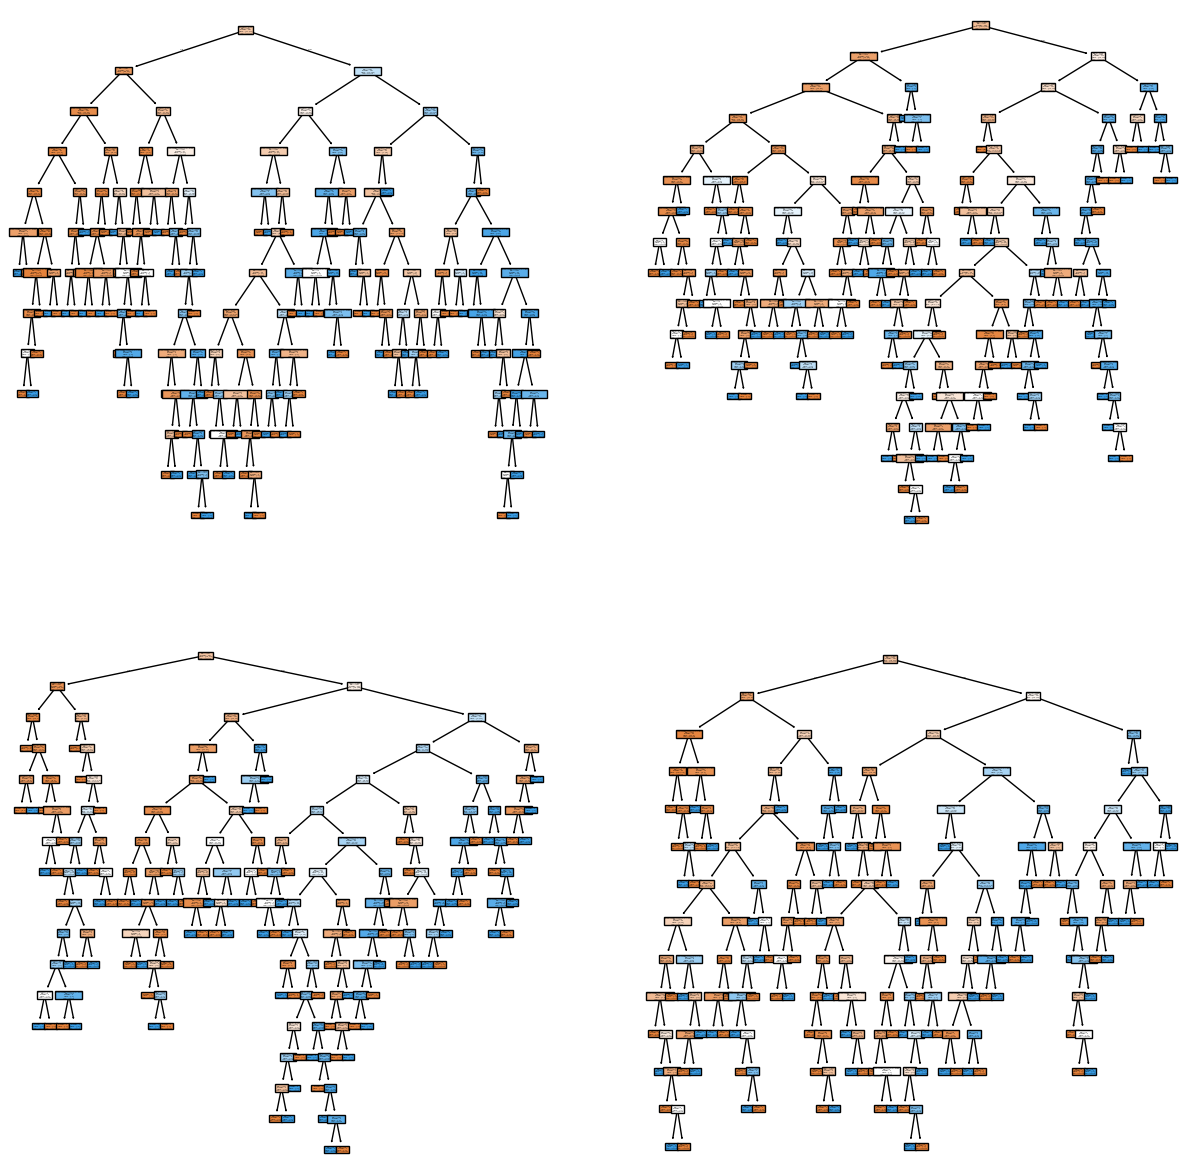

In [11]:
print("--------------(4). GRAFICO 4 DE LOS 100 ARBOLES QUE TIENE POR DEFECTO------------")
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Mostramos los 4 primeros árboles de los 100 generados (por defecto)
clases = ["Negativo", "Positivo"]
tree.plot_tree(model1.estimators_[0], ax = axis[0, 0], feature_names = list(X_train_data_final.columns), class_names = clases, filled = True)
tree.plot_tree(model1.estimators_[1], ax = axis[0, 1], feature_names = list(X_train_data_final.columns), class_names = clases, filled = True)
tree.plot_tree(model1.estimators_[2], ax = axis[1, 0], feature_names = list(X_train_data_final.columns), class_names = clases, filled = True)
tree.plot_tree(model1.estimators_[3], ax = axis[1, 1], feature_names = list(X_train_data_final.columns), class_names = clases, filled = True)

plt.show()

In [12]:
print("--------------(5). EJECUTO LA PREDICCION DEL TEST DEL MODELO ORIGINAL------------")
y_pred_test = model1.predict(X_test_data_final)
y_pred_test

--------------(5). EJECUTO LA PREDICCION DEL TEST DEL MODELO ORIGINAL------------


array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [13]:
print("------------(6). EJECUTO LA PREDICCION DEL TRAIN DEL MODELO ORIGINAL-----------")
y_pred_train = model1.predict(X_train_data_final)
y_pred_train

------------(6). EJECUTO LA PREDICCION DEL TRAIN DEL MODELO ORIGINAL-----------


array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [14]:
print("--------------(7). REALIZO METRICAS PARA MEDIR LOS DATOS DE ENTRENAMIENTO Y PRUEBA MODELO ORIGINAL----------")
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test Random Forest inicial: ", accuracy_test)
print("F1 score Test Random Forest inicial: ", f1_score_test)
print("Precision Test Random Forest inicial: ", precision_test)
print("Recall Test Random Forest inicial: ", recall_test)

print("Accuracy Train Random Forest inicial: ", accuracy_train)
print("F1 score Train Random Forest inicial: ", f1_score_train)
print("Precision Train Random Forest inicial: ", precision_train)
print("Recall Train Random Forest inicial: ", recall_train)

--------------(7). REALIZO METRICAS PARA MEDIR LOS DATOS DE ENTRENAMIENTO Y PRUEBA MODELO ORIGINAL----------
Accuracy Test Random Forest inicial:  0.7337662337662337
F1 score Test Random Forest inicial:  0.7337662337662337
Precision Test Random Forest inicial:  0.7337662337662337
Recall Test Random Forest inicial:  0.7337662337662337
Accuracy Train Random Forest inicial:  1.0
F1 score Train Random Forest inicial:  1.0
Precision Train Random Forest inicial:  1.0
Recall Train Random Forest inicial:  1.0


In [15]:
print("----------(8). COMPARAMOS LAS METRICAS DE PRUEBA-------------")
print(classification_report(y_test, y_pred_test, target_names=["Negativo", "Positivo"]))

----------(8). COMPARAMOS LAS METRICAS DE PRUEBA-------------
              precision    recall  f1-score   support

    Negativo       0.80      0.78      0.79        99
    Positivo       0.62      0.65      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.74       154



In [16]:
print("----------(9). COMPARAMOS LAS METRICAS DE ENTRENAMIENTO-------------")
print(classification_report(y_train, y_pred_train, target_names=["Negativo", "Positivo"]))

----------(9). COMPARAMOS LAS METRICAS DE ENTRENAMIENTO-------------
              precision    recall  f1-score   support

    Negativo       1.00      1.00      1.00       401
    Positivo       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



EN EL CONJUNTO DE PRUEBA DE LA CLASE NEGATIVOS PARA DIABETES EL MODELO PREDIJO:

Precision: 0.80: De todos los casos que el modelo predijo como negativos, el 80% eran realmente negativos.
Recall: 0.78: De todos los casos que eran realmente negativos, el modelo identificó correctamente el 78%.
F1-Score: 0.79: Un balance entre precisión y recall, indicando un rendimiento razonablemente equilibrado para la clase negativa en el conjunto de prueba.

EN EL CONJUNTO DE PRUEBA DE LA CLASE POSITIVOS PARA DIABETES EL MODELO PREDIJO:

Precision: 0.62: De todos los casos que el modelo predijo como positivos, solo el 62% eran realmente positivos. Esto indica un alto número de falsos positivos.
Recall: 0.64: De todos los casos que eran realmente positivos, el modelo identificó correctamente el 65%. Esto es bastante bueno y sugiere que el modelo está capturando una buena cantidad de casos positivos reales.
F1-Score: 0.65: Indica un rendimiento moderado para la clase positiva, con cierta desventaja en precisión.

EN EL CONJUNTO DE ENTRENAMIENTO TANTO PARA LA CLASE DE NEGATIVOS COMO POSITIVOS EL MODELO ESTABA OVERFITIANDO.

In [17]:
print("-----------(10). DEFINO LOS HIPERPARAMETROS A MANO PARA LA REGULARIZACION-----------")
rf = RandomForestClassifier(random_state=42)
# Defino hiperparametros a mano
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

-----------(10). DEFINO LOS HIPERPARAMETROS A MANO PARA LA REGULARIZACION-----------


In [18]:
print("--------------(1). CONFIGURO Y EJECUTO EL GRIDSEARCH--------------")

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajusto el modelo
grid_search.fit(X_train_data_final, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("LOS MEJORES HIPERPARAMETROS DEL GRIDSEARCHCV SON :", grid_search.best_params_)



--------------(1). CONFIGURO Y EJECUTO EL GRIDSEARCH--------------
LOS MEJORES HIPERPARAMETROS DEL GRIDSEARCHCV SON : {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 500}


In [19]:
print("---------(12) DEFINO NUEVAMENTE EL MODELO CON LOS MEJORES HIPERPARAMETROS DEL RANDOMFOREST---------")
# Definir el modelo con los mejores hiperparámetros 
model2 = RandomForestClassifier(criterion= 'entropy', max_depth= None, max_features= 'sqrt', min_samples_leaf= 5, min_samples_split= 20, n_estimators= 500)
print("--------------ENTRENO EL MODELO MEJORADO------------")
model2.fit(X_train_data_final, y_train)

---------(12) DEFINO NUEVAMENTE EL MODELO CON LOS MEJORES HIPERPARAMETROS DEL RANDOMFOREST---------
--------------ENTRENO EL MODELO MEJORADO------------


RandomForestClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=20, n_estimators=500)

In [20]:
print("---------------(13). REALIZO LAS PREDICCIONES DEL ENTRENAMIENTO Y PRUEBA CON HIPERPARAMETROS AJUSTADOS--------")
# Predicciones y evaluación del modelo optimizado en el conjunto de prueba
y_pred_test_hp = model2.predict(X_test_data_final)
y_pred_train_hp = model2.predict(X_train_data_final)

accuracy_test = accuracy_score(y_test, y_pred_test_hp)
accuracy_train = accuracy_score(y_train, y_pred_train_hp)

f1_score_test = f1_score(y_test, y_pred_test_hp, average='micro')
f1_score_train = f1_score(y_train, y_pred_train_hp, average='micro')

precision_test = precision_score(y_test, y_pred_test_hp, average='micro')
precision_train = precision_score(y_train, y_pred_train_hp, average='micro')

recall_test = recall_score(y_test, y_pred_test_hp, average='micro')
recall_train = recall_score(y_train, y_pred_train_hp, average='micro')

print("Accuracy Test ajustado: ", accuracy_test)
print("F1 score Test ajustado: ", f1_score_test)
print("Precision Test ajustado: ", precision_test)
print("Recall Test ajustado: ", recall_test)

print("Accuracy Train ajustado: ", accuracy_train)
print("F1 score Train ajustado: ", f1_score_train)
print("Precision Train ajustado: ", precision_train)
print("Recall Train ajustado: ", recall_train)

---------------(13). REALIZO LAS PREDICCIONES DEL ENTRENAMIENTO Y PRUEBA CON HIPERPARAMETROS AJUSTADOS--------
Accuracy Test ajustado:  0.7662337662337663
F1 score Test ajustado:  0.7662337662337663
Precision Test ajustado:  0.7662337662337663
Recall Test ajustado:  0.7662337662337663
Accuracy Train ajustado:  0.8876221498371335
F1 score Train ajustado:  0.8876221498371335
Precision Train ajustado:  0.8876221498371335
Recall Train ajustado:  0.8876221498371335


In [21]:
print("----------(14). COMPARAMOS LAS METRICAS DE LA PRUEBA CON HIPERPARAMETROS-------------")
print(classification_report(y_test, y_pred_test_hp, target_names=["Negativo", "Positivo"]))

----------(14). COMPARAMOS LAS METRICAS DE LA PRUEBA CON HIPERPARAMETROS-------------
              precision    recall  f1-score   support

    Negativo       0.82      0.82      0.82        99
    Positivo       0.67      0.67      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [22]:
print("----------(15). COMPARAMOS LAS METRICAS DEL ENTRENAMIENTO CON HIPERPARAMETROS-------------")
print(classification_report(y_train, y_pred_train_hp, target_names=["Negativo", "Positivo"]))

----------(15). COMPARAMOS LAS METRICAS DEL ENTRENAMIENTO CON HIPERPARAMETROS-------------
              precision    recall  f1-score   support

    Negativo       0.89      0.95      0.92       401
    Positivo       0.89      0.77      0.83       213

    accuracy                           0.89       614
   macro avg       0.89      0.86      0.87       614
weighted avg       0.89      0.89      0.89       614



EN EL CONJUNTO DE PRUEBA DE LA CLASE NEGATIVO PARA DIABETES CON HIPERPARAMETROS EL MODELO PREDIJO:

Precision: 0.82: De todos los casos que el modelo predijo como negativos, el 82% eran realmente negativos.
Recall: 0.82: De todos los casos que eran realmente son negativos, el modelo identificó correctamente el 82%.
F1-Score: 0.82: Un balance entre precisión y recall, indicando un rendimiento razonablemente equilibrado para la clase negativa en el conjunto de prueba.

EN EL CONJUNTO DE PRUEBA DE LA CLASE POSITIVOS PARA DIABETES CON HIPERPARAMETROS EL MODELO PREDIJO:

Precision: 0.67: De todos los casos que el modelo predijo como positivos, solo el 67% eran realmente positivos. Esto indica un alto número de falsos positivos.
Recall: 0.67: De todos los casos que eran realmente son positivos, el modelo identificó correctamente el 67%. Esto es bastante bueno y sugiere que el modelo está capturando una buena cantidad de casos positivos reales.
F1-Score: 0.67: Indica un rendimiento moderado para la clase positiva, con cierta desventaja en precisión.

EN EL CONJUNTO DE ENTRENAMIENTO TANTO PARA LA CLASE DE NEGATIVOS COMO POSITIVOS EL MODELO DEJO DE OVERFITIAR Y SE ENCUENTRA MUY PARECIDO CON LAS METRICAS DEL CONJUNTO DE PRUEBA.

In [24]:

print("----------(16). GUARDO LOS DATOS DE ENTRENAMIENTO Y PRUEBA EN GITHUB-------------")
# Define la ruta en tu codespace de GitHub
train_path = ('/workspaces/RandomForest-Jorge3127/data/processed/dataset_limpio_diabetes_RandomForest_train.csv')
test_path = ('/workspaces/RandomForest-Jorge3127/data/processed/dataset_limpio_diabetes_RandomForest_test.csv')

# Asegúrate de que las carpetas en la ruta existen
os.makedirs(os.path.dirname(train_path), exist_ok=True)
os.makedirs(os.path.dirname(test_path), exist_ok=True)

# Guarda x_train_final en la ruta especificada
X_train_data_final.to_csv(train_path, index=False)

# Guarda x_test_final en la ruta especificada
X_test_data_final.to_csv(test_path, index=False)

----------(16). GUARDO LOS DATOS DE ENTRENAMIENTO Y PRUEBA EN GITHUB-------------
